In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
project_path = '/content/drive/MyDrive/ds_teju'


In [ ]:
import pandas as pd

# Example CSV save
df = pd.DataFrame({'a':[1,2], 'b':[3,4]})
df.to_csv(f'{project_path}/csv_files/example.csv', index=False)


In [ ]:
import pandas as pd

# Load Fear & Greed Index
btc_sentiment = pd.read_csv(f'{project_path}/csv_files/Copy of fear_greed_index.csv')

# Load Historical Trader Data
trader_data = pd.read_csv(f'{project_path}/csv_files/Copy of historical_data.csv')

# Quick look
btc_sentiment.head()
trader_data.head()


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12

In [ ]:
print("BTC Sentiment missing values:\n", btc_sentiment.isnull().sum())
print("\nTrader Data missing values:\n", trader_data.isnull().sum())


BTC Sentiment missing values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trader Data missing values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [ ]:
print(btc_sentiment.columns)
print(trader_data.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [ ]:
# Remove extra spaces and lowercase everything (optional)
btc_sentiment.rename(columns=lambda x: x.strip(), inplace=True)
trader_data.rename(columns=lambda x: x.strip(), inplace=True)

# Check columns again
print(btc_sentiment.columns)
print(trader_data.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [ ]:
btc_sentiment['Date'] = pd.to_datetime(btc_sentiment['date'])
trader_data['Date'] = pd.to_datetime(trader_data['Timestamp IST'])


ValueError: time data "18-03-2025 12:50" doesn't match format "%m-%d-%Y %H:%M", at position 18. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# BTC Sentiment
btc_sentiment['Date'] = pd.to_datetime(btc_sentiment['date'])

# Trader Data (dayfirst=True because format is DD-MM-YYYY HH:MM)
trader_data['Date'] = pd.to_datetime(trader_data['Timestamp IST'], dayfirst=True)



In [ ]:
print(btc_sentiment['Date'].head())
print(trader_data['Date'].head())


0   2018-02-01
1   2018-02-02
2   2018-02-03
3   2018-02-04
4   2018-02-05
Name: Date, dtype: datetime64[ns]
0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: Date, dtype: datetime64[ns]


In [ ]:
merged_data = pd.merge(trader_data, btc_sentiment[['Date','classification']], on='Date', how='left')
merged_data.head()


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp                Date  \
0     True  0.345404  8.950000e+14  1.730000e+12 2024-12-02 22:50:00   
1     True  0.005600  4.430000e+14  1.730000e+12 2024-12-02 22:50:00   
2     True  0.050431  6.600000e+14  1.730000e+12 2024-12-02 22:50:00   
3     True  0.050043  1.080000e+15  1.730000e+12 2024-12-02 22:50:00   
4     True  0.003055  1.050000e+15  1.730000e+12 2024-12-02 22:50:00   

  classification  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [ ]:
btc_sentiment = btc_sentiment[['Date','classification']]  # keep only necessary columns

trader_data = trader_data[['Account', 'Coin', 'Execution Price', 'Size USD', 'Side',
                           'Closed PnL', 'Date', 'Start Position', 'Direction']]


In [ ]:
merged_data = pd.merge(trader_data, btc_sentiment, on='Date', how='left')
merged_data.head()


Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size USD Side  Closed PnL                Date  Start Position Direction  \
0   7872.16  BUY         0.0 2024-12-02 22:50:00        0.000000       Buy   
1    127.68  BUY         0.0 2024-12-02 22:50:00      986.524596       Buy   
2   1150.63  BUY         0.0 2024-12-02 22:50:00     1002.518996       Buy   
3   1142.04  BUY         0.0 2024-12-02 22:50:00     1146.558564       Buy   
4     69.75  BUY         0.0 2024-12-02 22:50:00     1289.488521       Buy   

  classification  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

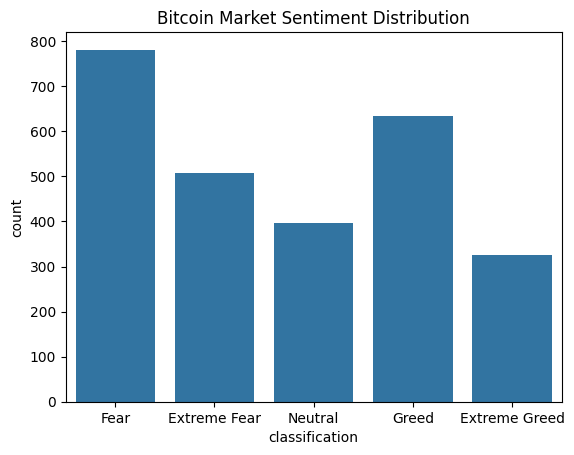

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='classification', data=btc_sentiment)
plt.title('Bitcoin Market Sentiment Distribution')
plt.savefig(f'{project_path}/outputs/sentiment_distribution.png')
plt.show()


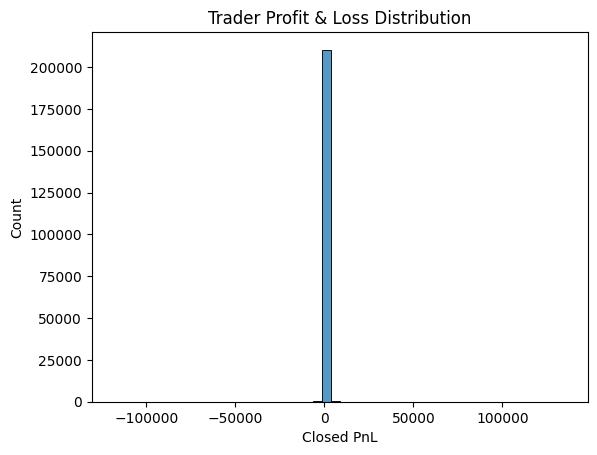

In [ ]:
sns.histplot(merged_data['Closed PnL'], bins=50)
plt.title('Trader Profit & Loss Distribution')
plt.savefig(f'{project_path}/outputs/pnl_distribution.png')
plt.show()


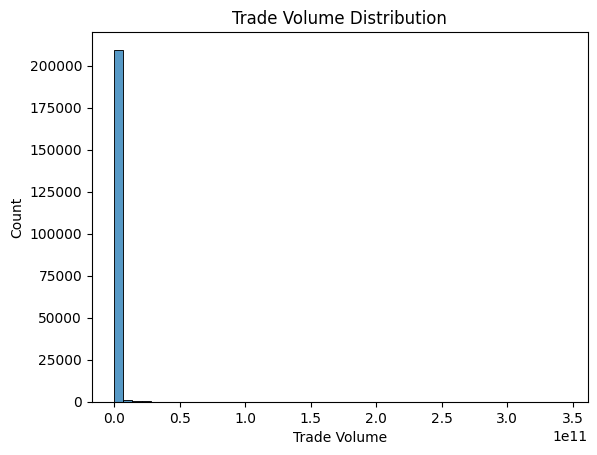

In [ ]:
merged_data['Trade Volume'] = merged_data['Execution Price'] * merged_data['Size USD']

sns.histplot(merged_data['Trade Volume'], bins=50)
plt.title('Trade Volume Distribution')
plt.savefig(f'{project_path}/outputs/volume_distribution.png')
plt.show()


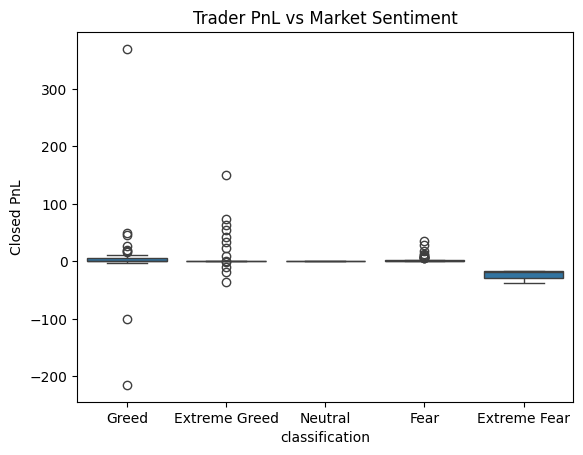

In [ ]:
sns.boxplot(x='classification', y='Closed PnL', data=merged_data)
plt.title('Trader PnL vs Market Sentiment')
plt.savefig(f'{project_path}/outputs/pnl_vs_sentiment.png')
plt.show()


In [27]:
!git config --global user.name "tejeshwini"
!git config --global user.email "tejeshwinirajendran@gmail.com"


In [30]:
%%writefile .gitignore
*.gdoc
*.gsheet
*.tmp


Writing .gitignore


In [31]:
!git add .


In [32]:
!git commit -m "Initial commit: Data Science assignment structure and notebooks"


[master (root-commit) 04c58b1] Initial commit: Data Science assignment structure and notebooks
 9 files changed, 213874 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 csv_files/Copy of fear_greed_index.csv
 create mode 100644 csv_files/Copy of historical_data.csv
 create mode 100644 notebook_1.ipynb
 create mode 100644 outputs/example_plot.png
 create mode 100644 outputs/pnl_distribution.png
 create mode 100644 outputs/pnl_vs_sentiment.png
 create mode 100644 outputs/sentiment_distribution.png
 create mode 100644 outputs/volume_distribution.png


In [43]:
!git remote add origin https://github.com/tejeshwini2425/ds_teju.git


error: remote origin already exists.


In [44]:
!git branch -M main


In [45]:
!git push -u origin main


fatal: could not read Username for 'https://github.com': No such device or address
